Program 2 - Implement a program to count word frequency and to remove stop words.

Objective of the Program:

To develop a word frequency analyzer in the EdTech (Educational Technology) domain that helps learners and educators identify commonly used words in learning materials. The program counts total words, removes stop words (in multiple languages), compares case-sensitive and case-insensitive processing, and visualizes word frequency using a bar chart—enhancing understanding of text preprocessing in Natural Language Processing (NLP).



In [ ]:
!pip install nltk matplotlib langdetect

import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from langdetect import detect
def getStopWordsAuto(inputText):
    try:
        langMap = {'en': 'english', 'fr': 'french', 'es': 'spanish', 'de': 'german', 'pt': 'portuguese'}
        detected = detect(inputText)
        return stopwords.words(langMap.get(detected, 'english')), langMap.get(detected, 'english')
    except:
        print("Language detection failed.")
        return [], 'unknown'

def processText(inputText, stopWordList, convertLower):
    if convertLower:
        inputText = inputText.lower()
    wordList = word_tokenize(inputText)
    totalWords = len(wordList)
    removedWords = [w for w in wordList if w in stopWordList and w.isalnum()]
    filteredWords = [w for w in wordList if w.isalnum() and w not in stopWordList]
    filteredCount = len(filteredWords)
    wordFrequency = {}
    for word in filteredWords:
        wordFrequency[word] = wordFrequency.get(word, 0) + 1
    return totalWords, filteredCount, wordFrequency, removedWords

def plotFrequency(freqDict, titleText, topN):
    if len(freqDict) == 0:
        print("No data to plot.")
        return
    sortedItems = sorted(freqDict.items(), key=lambda item: item[1], reverse=True)
    topItems = sortedItems[:topN]
    labels, counts = zip(*topItems)
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color='skyblue')
    plt.title(titleText)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()


EdTech Learning Tool - Word Frequency Analyzer
Enter your learning content or notes:
god is good god is great
How many top keywords do you want to visualize? 2
Detected language for stopword removal: english

--- Word Count Comparison ---
Original Total Words: 6
Filtered Words (With Case): 4
Filtered Words (Lowercase): 4

--- Stopwords Removed ---
With Case: {'is'}
Lowercase: {'is'}

--- Frequency with Case Sensitive Filtering ---
{'god': 2, 'good': 1, 'great': 1}

--- Frequency with Lowercase Filtering ---
{'god': 2, 'good': 1, 'great': 1}


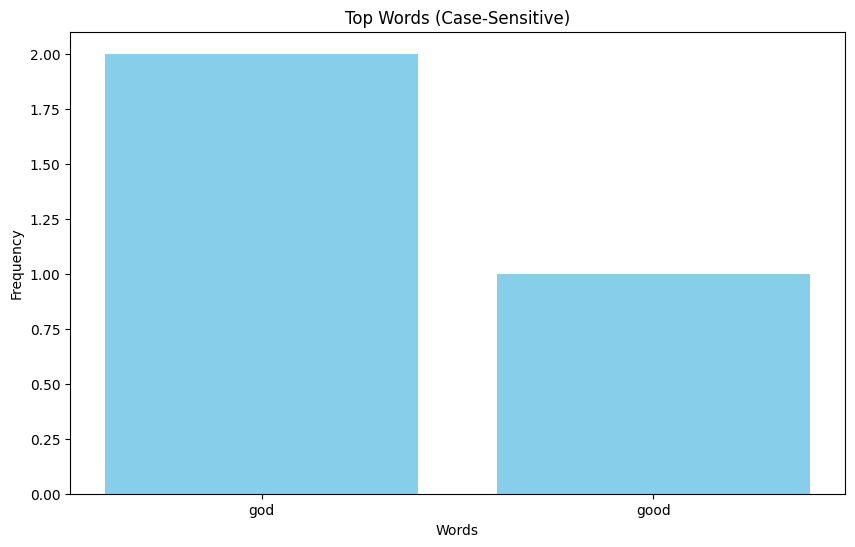

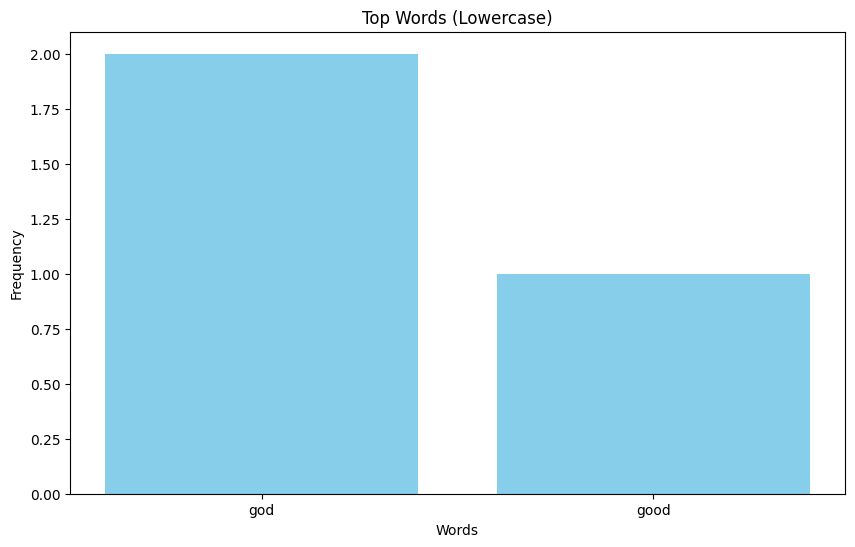

In [ ]:
def main():
    print("EdTech Learning Tool - Word Frequency Analyzer")
    inputText = input("Enter your learning content or notes:\n")
    topN = int(input("How many top keywords do you want to visualize? "))

    stopWordList, detectedLang = getStopWordsAuto(inputText)
    print("Detected language for stopword removal:", detectedLang)

    totalWithCase, filteredWithCase, freqWithCase, removed1 = processText(inputText, stopWordList, convertLower=False)
    totalLower, filteredLower, freqLower, removed2 = processText(inputText, stopWordList, convertLower=True)

    print("\n--- Word Count Comparison ---")
    print("Original Total Words:", totalWithCase)
    print("Filtered Words (With Case):", filteredWithCase)
    print("Filtered Words (Lowercase):", filteredLower)

    print("\n--- Stopwords Removed ---")
    print("With Case:", set(removed1))
    print("Lowercase:", set(removed2))

    print("\n--- Frequency with Case Sensitive Filtering ---")
    print(freqWithCase)

    print("\n--- Frequency with Lowercase Filtering ---")
    print(freqLower)

    plotFrequency(freqWithCase, "Top Words (Case-Sensitive)", topN)
    plotFrequency(freqLower, "Top Words (Lowercase)", topN)

try:
    main()
except Exception as error:
    print("Error occurred:", str(error))
